In [1]:
import numpy as np
import pandas as pd
from operator import itemgetter

In [2]:
d=pd.read_csv("class1.csv")
print(d[:5])
x=d.iloc[:,:-1].values
y=d.iloc[:,[2]].values

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [3]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
imp=imp.fit(x)
x=imp.transform(x)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 2)
(100, 2)
(300, 1)
(100, 1)


In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [6]:
#returning eucledian dist with their class
def eucledian_dist(x,y,xinp):
    dist=np.sqrt(np.sum((x-xinp)**2,axis=1).reshape((x.shape[0],1)))
    dist=np.hstack((dist,y))
    return dist

In [7]:
def index(self, value):
    return np.where(self == value)

In [8]:
def predict(x,k_neighbors=5):
    y_pred=np.array([])
    for xinp in x:
        nbrs=[]
        d={}
        nbrs=eucledian_dist(x_train,y_train,xinp)
        #sorting acc to euc_dist.
        nbrs=nbrs[nbrs[:, 0].argsort()]
        #getting k neighbors
        nbrs=nbrs[:k_neighbors]
        unq_elmnts, cnt_cls= np.unique(nbrs[:,1], return_counts=True)
        #getting the maximum occuring class in k neighbor
        pred=np.array([unq_elmnts[np.argmax(cnt_cls)]])
        y_pred=np.concatenate((y_pred,pred))
    return (y_pred.reshape((y_pred.shape[0],1)))
        

In [9]:
y_pred=predict(x_test)

In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

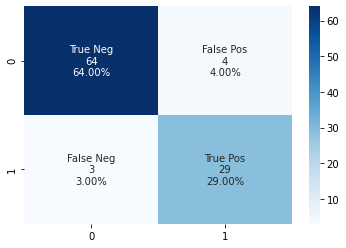

In [11]:
import seaborn as sns
def drawCmPlot(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

drawCmPlot(cm)

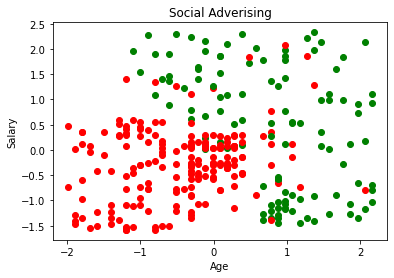

In [12]:
# Visualising the Training set results
import matplotlib.pyplot as plt
cls_clr={0:"red",1:"green"}
for i in range(x_train.shape[0]):
    plt.scatter(x_train[i,0],x_train[i,1], color=cls_clr[y_train[i,0]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

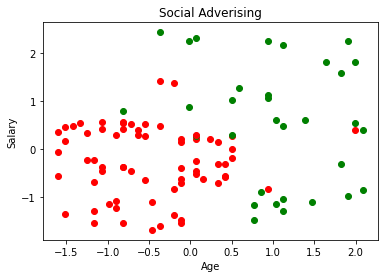

In [13]:
#visualising teh Test set results
for i in range(x_test.shape[0]):
    plt.scatter(x_test[i,0],x_test[i,1], color=cls_clr[y_test[i,0]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

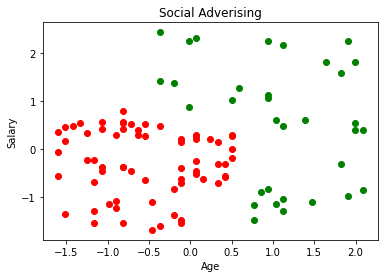

In [15]:
# Visualising the Test-pred set results
for i in range(x_test.shape[0]):
    plt.scatter(x_test[i,0],x_test[i,1],color=cls_clr[y_pred[i,0]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()